In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#import networkx as nx
import time
import seaborn as sns
import re
import math
sns.set_style("whitegrid")
#sns.set(style="darkgrid")
sns.set_palette("tab10")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

import datetime as dt
plt.style.use('seaborn-notebook')
params = {'legend.fontsize': 16,
          'legend.title_fontsize': 16,
          'figure.figsize': (15, 5),
          'axes.labelsize': 18,
          'axes.titlesize': 20,
          'xtick.labelsize': 18,
          'ytick.labelsize': 18}
plt.rcParams.update(params)
ing_fmt = 'svg'

import warnings
warnings.filterwarnings("ignore")

In [3]:
streaming_df = pd.read_csv('streaming_set.csv')
streaming_df.head(3)

,id,title,director,cast,description,duration_int,duration_type,country,release_year,platform,type,listed_in,rating,score(average),date_added
0,as1,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",a small fishing village must procure a local d...,113,min,canada,2014,amazon,movie,"comedy, drama",G,3.467131,2021-03-30 00:00:00
1,as2,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",a metro family decides to fight a cyber crimin...,110,min,india,2018,amazon,movie,"drama, international",13+,3.548682,2021-03-30 00:00:00
2,as3,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",after a man discovers his wife is cheating on ...,74,min,united states,2017,amazon,movie,"action, drama, suspense",G,3.500000,2021-03-30 00:00:00


In [3]:
streaming_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              22998 non-null  object 
 1   title           22998 non-null  object 
 2   director        22998 non-null  object 
 3   cast            22998 non-null  object 
 4   description     22998 non-null  object 
 5   duration_int    22998 non-null  int64  
 6   duration_type   22998 non-null  object 
 7   country         22998 non-null  object 
 8   release_year    22998 non-null  int64  
 9   platform        22998 non-null  object 
 10  type            22998 non-null  object 
 11  listed_in       22998 non-null  object 
 12  rating          22998 non-null  object 
 13  score(average)  22998 non-null  float64
 14  date_added      22998 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 2.6+ MB


### **Tipos de streaming**

In [4]:
count = streaming_df['type'].value_counts()
percent = 100 * streaming_df['type'].value_counts(normalize=True)
type_df = pd.DataFrame({'count':count, 'percent': percent.round(1)})
type_df

,count,percent
movie,16481,71.7
tv show,6517,28.3


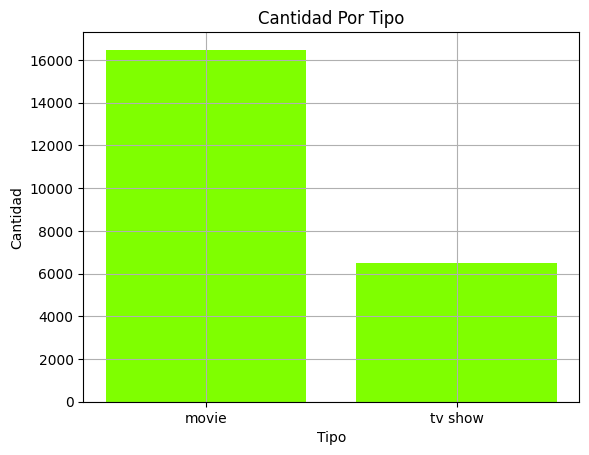

In [5]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = plt.axes()

x = type_df.index
y = type_df['count']

plt.bar(x, y, color = "chartreuse")
#plt.show()

ax.set(xlabel='Tipo', ylabel='Cantidad',
       title='Cantidad Por Tipo')

ax.grid()

Tenemos solo dos tipo de streaming: **Movie** y **Tv Show** de los cuales el tipo movie representa un 71.2% y tv show representa 28.3%

### **Plataforma**

In [6]:
count = streaming_df['platform'].value_counts()
percent = 100 * streaming_df['platform'].value_counts(normalize=True)
platform_df = pd.DataFrame({'count':count, 'percent': percent.round(1)})
platform_df

,count,percent
amazon,9668,42.0
netflix,8807,38.3
hulu,3073,13.4
disney,1450,6.3


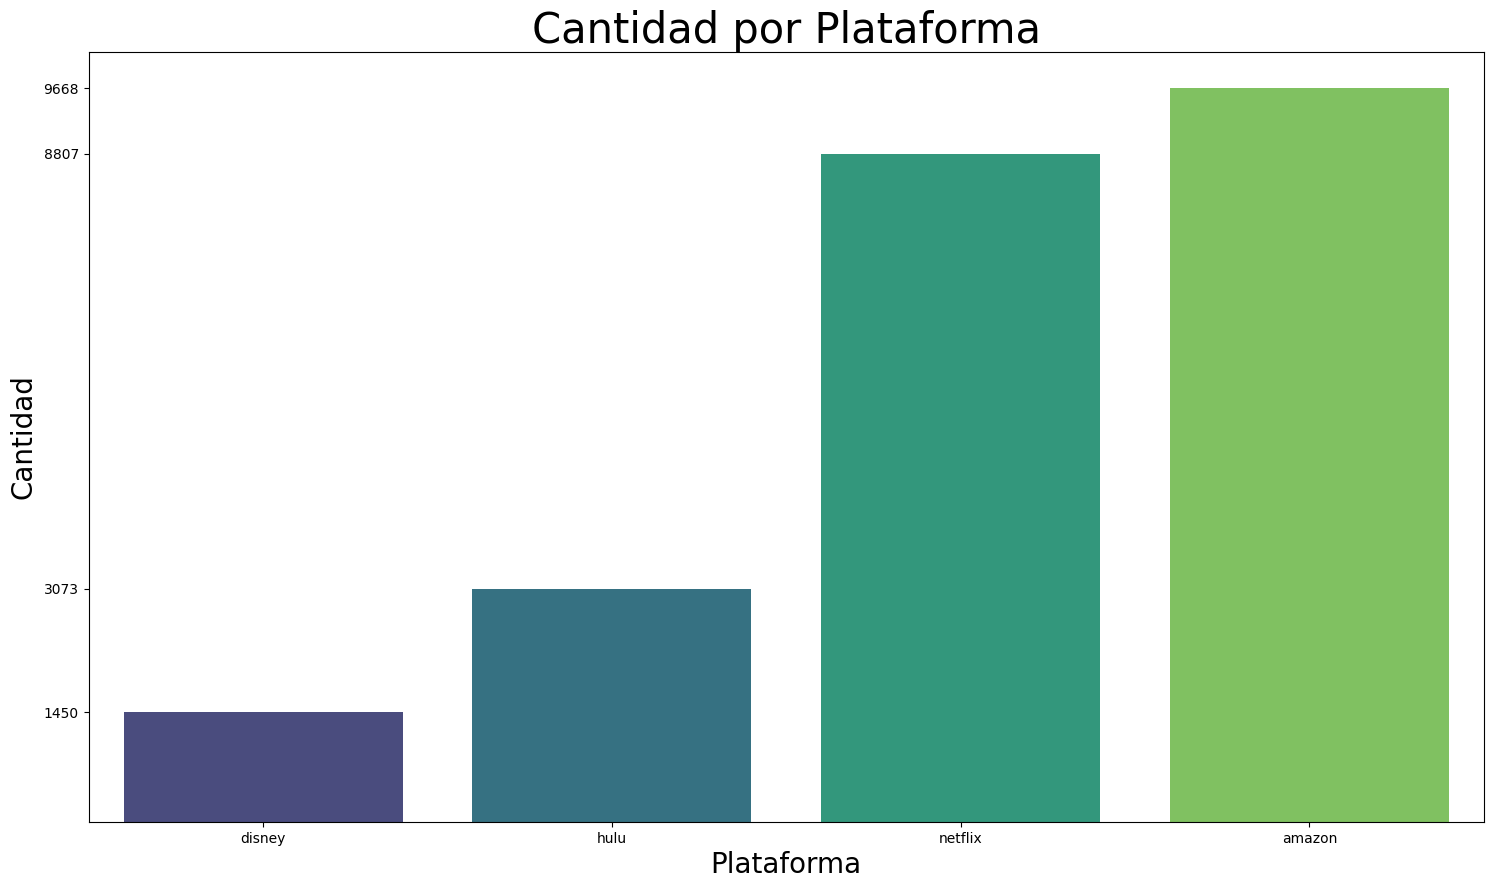

In [26]:
plt.figure(figsize=(18,10))
sns.barplot(x=streaming_df['platform'].value_counts().sort_values().index, y=streaming_df['platform'].value_counts().sort_values().values, palette='viridis');
plt.title('Cantidad por Plataforma', color= 'black', fontsize= 30)
plt.yticks(streaming_df['platform'].value_counts().sort_values().values);
plt.xlabel('Plataforma', fontsize= 20);
plt.ylabel('Cantidad', fontsize= 20);

Amazon (42%) y Netflix (38.3%) son las plataformas que más contenido producen 

### **Géneros más vistos**

In [27]:
''' Extraemos el género principal en una nueva columna '''
ListedIn_df = streaming_df.copy()
ListedIn_df['listedIn_main'] = ListedIn_df['listed_in'].apply(lambda x: x.split(',')[0])

In [28]:
ListedIn_df['listedIn_main'].unique().shape[0] 

96

In [29]:
ListedIn_df['listedIn_main'].value_counts().head(8)

drama                 2658
action                2212
comedy                2136
dramas                1600
documentaries         1262
comedies              1210
documentary            978
action & adventure     859
Name: listedIn_main, dtype: int64

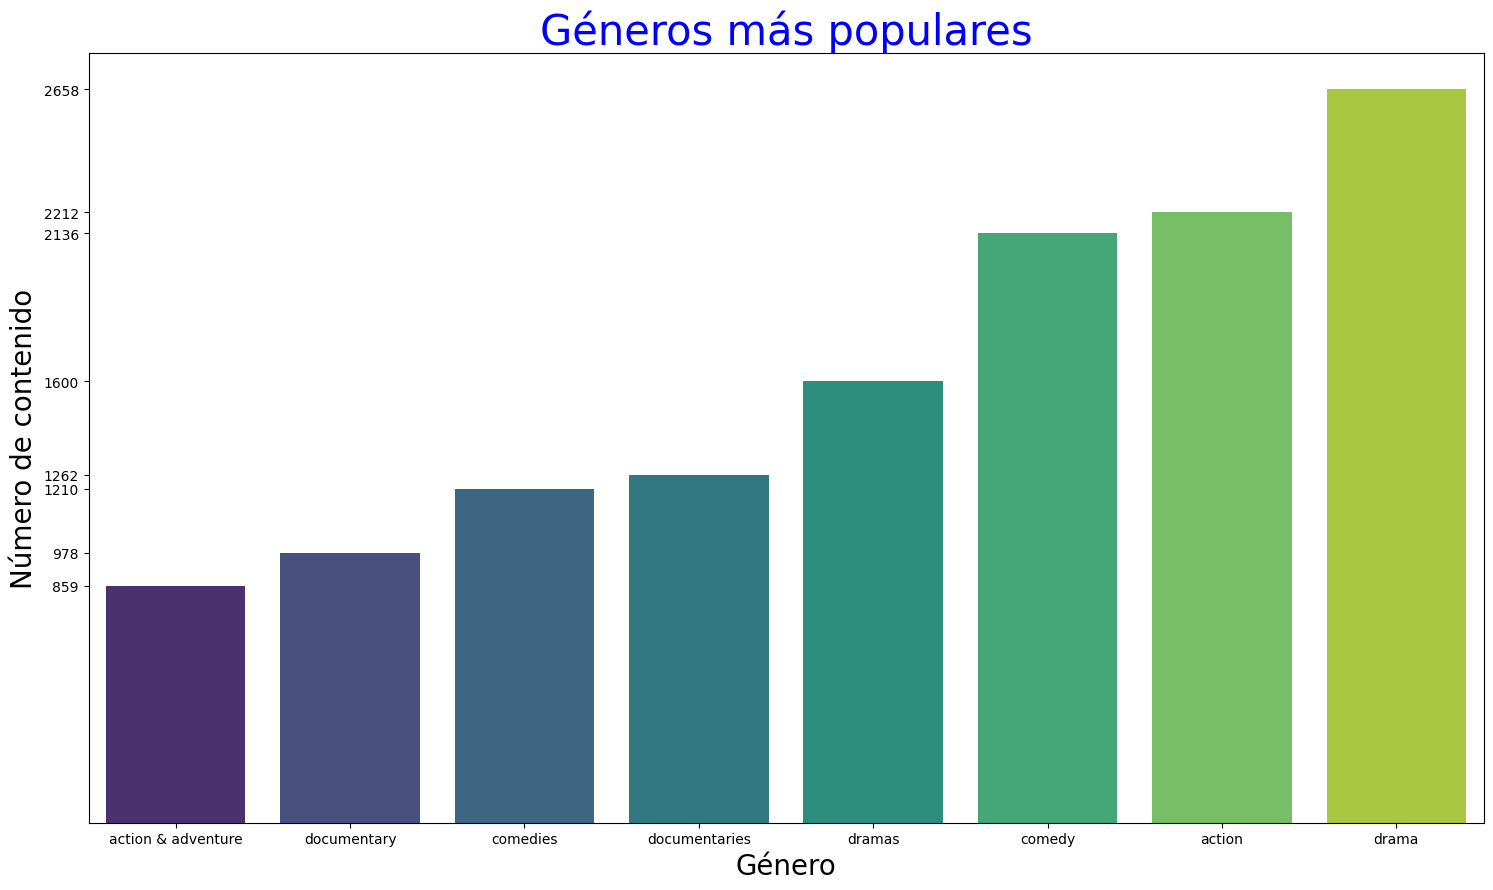

In [41]:
x=ListedIn_df['listedIn_main'].value_counts()[:8].sort_values().index 
y=ListedIn_df['listedIn_main'].value_counts()[:8].sort_values().values

plt.figure(figsize=(18,10))
sns.barplot(x=x, y=y,palette='viridis');
plt.title('Géneros más populares', color= 'Blue', fontsize= 30)
plt.yticks(ListedIn_df['listedIn_main'].value_counts()[:8].sort_values().values);
plt.xlabel('Género',fontsize= 20);
plt.ylabel('Número de contenido',fontsize= 20);

Los Generos de *drama*, *acción* y *comedia*  son los más aclamados por elpúblico

### **Paises que producen más streaming**

In [42]:
country_df = streaming_df.copy()
# Insertamos una nueva columna con el país principal
country_df['country_main'] = country_df['country'].apply(lambda x: x.split(',')[0])
# Número de paises únicos
print('Paises únicos: ',country_df['country_main'].unique().shape[0])

Paises únicos:  90


In [43]:
''' Tabla que muestra el pais, su frecuencia y porcentaje '''
count = country_df['country_main'].value_counts()
percent = 100 * country_df['country_main'].value_counts(normalize=True)
pd.DataFrame({'count':count, 'percent': percent.round(2)})

,count,percent
no_data,11499,50.00
united states,5619,24.43
india,1248,5.43
united kingdom,889,3.87
japan,536,2.33
...,...,...
luxembourg,1,0.00
cameroon,1,0.00
syria,1,0.00
tanzania,1,0.00


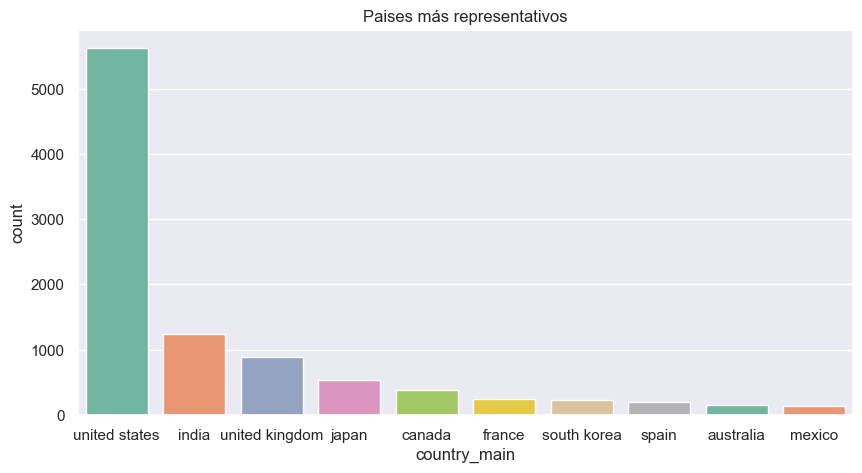

In [44]:
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
sns.countplot(x ='country_main', data = country_df , palette='Set2',order = country_df['country_main'].value_counts().index[1:11]);
plt.title('Paises más representativos');

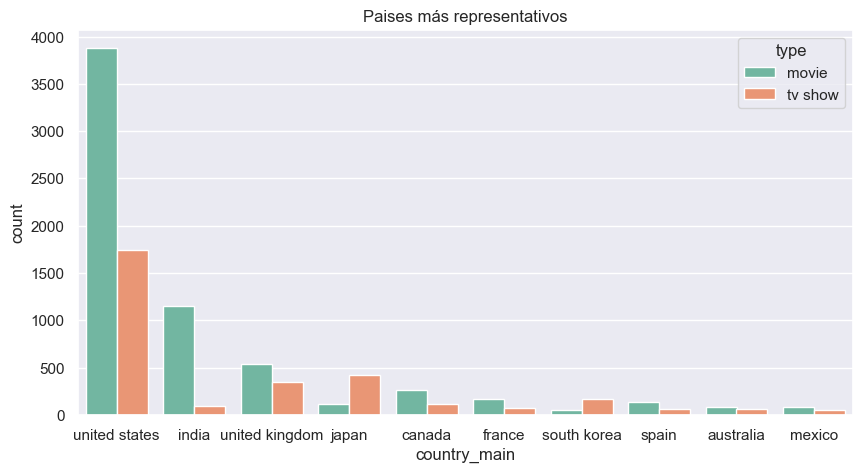

In [45]:
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
sns.countplot(x ='country_main', data = country_df , palette='Set2',order = country_df['country_main'].value_counts().index[1:11],hue='type');
plt.title('Paises más representativos');

Estados Unidos, e India son los mayores productores de streaming 

### **Clasicación más vista**

In [51]:
streaming_df['rating'].unique()

array(['G', '13+', 'all', '18+', 'r', 'tv-y', 'tv-y7', 'nr', '16+',
       'tv-pg', '7+', 'tv-14', 'tv-nr', 'tv-g', 'pg-13', 'tv-ma', 'g',
       'pg', 'nc-17', 'unrated', '16', 'ages_16_', 'ages_18_', 'all_ages',
       'not_rate', 'tv-y7-fv', 'not rated', '2 seasons', '93 min',
       '4 seasons', '136 min', '91 min', '85 min', '98 min', '89 min',
       '94 min', '86 min', '3 seasons', '121 min', '88 min', '101 min',
       '1 season', '83 min', '100 min', '95 min', '92 min', '96 min',
       '109 min', '99 min', '75 min', '87 min', '67 min', '104 min',
       '107 min', '84 min', '103 min', '105 min', '119 min', '114 min',
       '82 min', '90 min', '130 min', '110 min', '80 min', '6 seasons',
       '97 min', '111 min', '81 min', '49 min', '45 min', '41 min',
       '73 min', '40 min', '36 min', '39 min', '34 min', '47 min',
       '65 min', '37 min', '78 min', '102 min', '129 min', '115 min',
       '112 min', '61 min', '106 min', '76 min', '77 min', '79 min',
       '157 min', '

In [39]:
a = streaming_df[streaming_df['rating'].str.contains('min')]['type'].unique()
b =streaming_df[streaming_df['rating'].str.contains('min')]['type'].count()
c = streaming_df[streaming_df['rating'].str.contains('season')]['type'].unique()
d = streaming_df[streaming_df['rating'].str.contains('seasons')]['type'].count()

clase = ['min', 'season']
amount = [b,d]
group = [a,c]

df_aux = pd.DataFrame(list(zip(clase,amount,group)), columns = ['Duración','Amount','Type'])
df_aux

,Duración,Amount,Type
0,min,233,[movie]
1,season,20,[movie]


In [52]:
''' Filtramos solo las intancias que si tienen clasificiación '''
lista = ['G', '13+', 'all', '18+', 'r', 'tv-y', 'tv-y7', 'nr', '16+',
       'tv-pg', '7+', 'tv-14', 'tv-nr', 'tv-g', 'pg-13', 'tv-ma', 'g',
       'pg', 'nc-17', '16', 'ages_16_', 'ages_18_', 'all_ages','tv-y7-fv','ur']

rating_df = streaming_df[streaming_df['rating'].isin(lista)]
rating_df['rating'].unique()

array(['G', '13+', 'all', '18+', 'r', 'tv-y', 'tv-y7', 'nr', '16+',
       'tv-pg', '7+', 'tv-14', 'tv-nr', 'tv-g', 'pg-13', 'tv-ma', 'g',
       'pg', 'nc-17', '16', 'ages_16_', 'ages_18_', 'all_ages',
       'tv-y7-fv', 'ur'], dtype=object)

In [53]:
''' Hacemos una normalización '''
rating_df['rating'].replace({'g':'G'},inplace=True)
rating_df['rating'].replace({'16':'ages_16_'},inplace=True)

C:\Users\jessg\AppData\Local\Temp\ipykernel_24000\526790529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_df['rating'].replace({'g':'G'},inplace=True)
C:\Users\jessg\AppData\Local\Temp\ipykernel_24000\526790529.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_df['rating'].replace({'16':'ages_16_'},inplace=True)


La siguiente tabla muestra la relación entre el `rating` para `movie`, `tv show` y sus totales

In [54]:
rating_df['Total']=1 # Agregamos esta columna para ayudarnos en la pivot table
table1 = pd.pivot_table(rating_df,values='Total', index = ['rating'], columns=['type'], aggfunc=np.sum)
table2 =pd.pivot_table(rating_df,values='Total',index=['rating'], aggfunc=np.sum)
df = pd.merge(table1, table2, on='rating').sort_values(by='Total', ascending=False)
df

C:\Users\jessg\AppData\Local\Temp\ipykernel_24000\1405771725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_df['Total']=1 # Agregamos esta columna para ayudarnos en la pivot table


,movie,tv show,Total
rating,,,
tv-ma,2154.0,1521.0,3675
tv-14,1546.0,1592.0,3138
r,2152.0,2.0,2154
13+,1849.0,268.0,2117
tv-pg,770.0,884.0,1654
16+,1272.0,275.0,1547
G,1029.0,240.0,1269
all,988.0,280.0,1268
18+,1097.0,146.0,1243


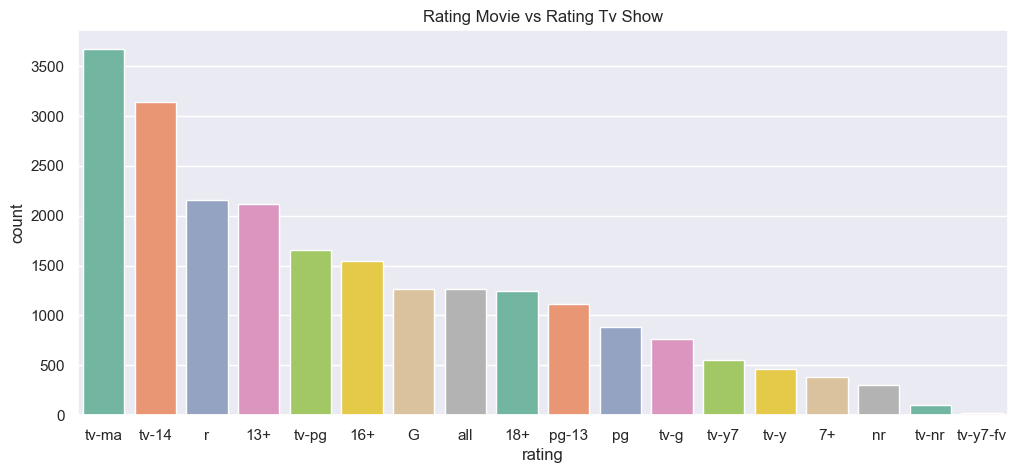

In [55]:
# Movies ratings
plt.figure(figsize=(12,5))
sns.set(style="darkgrid")
sns.countplot(x='rating', data = rating_df, palette='Set2',order=rating_df['rating'].value_counts().index[0:18]);
plt.title('Rating Movie vs Rating Tv Show');

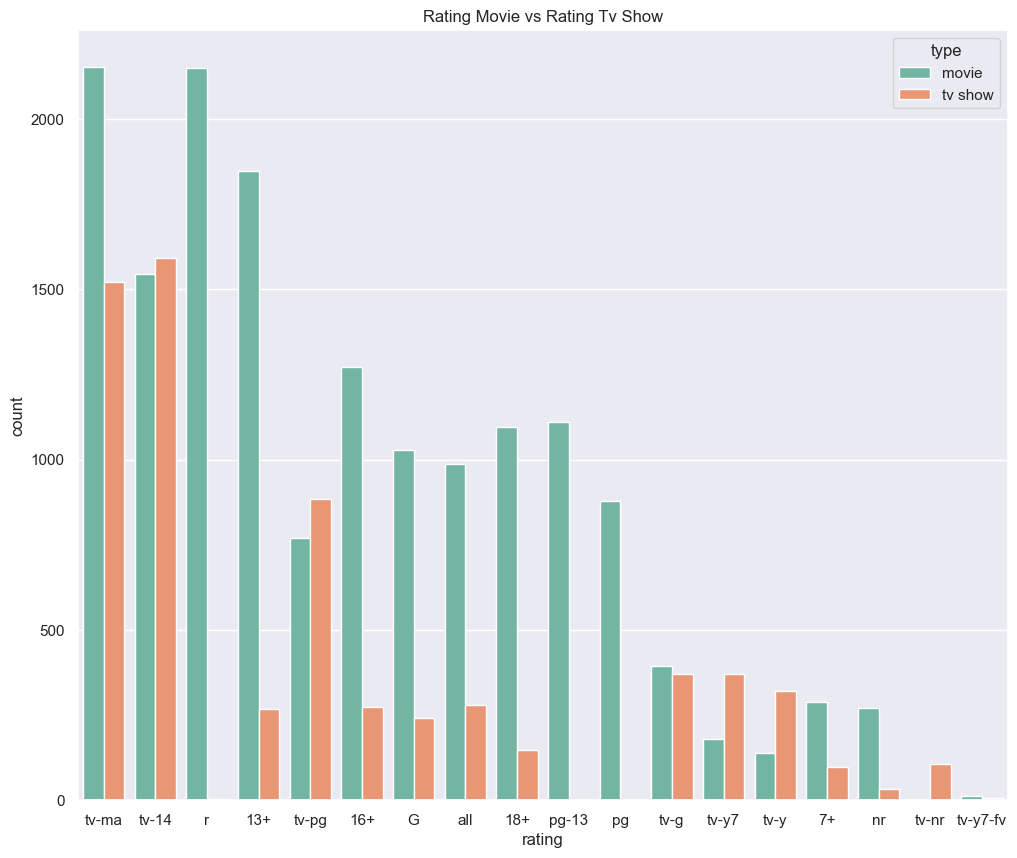

In [56]:
# Movies ratings
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
sns.countplot(x='rating', data = rating_df, palette='Set2',order=rating_df['rating'].value_counts().index[0:18],hue='type');
plt.title('Rating Movie vs Rating Tv Show');

Hay más contenido para la clasificación de tv-ma (apto solo para mayores) 

### **Director con más presencia**

In [57]:
# Extraemos todos los directores, en una lista 
l = streaming_df['director'].shape[0]   

lista_director = []

for i in range(0,l):
    lista = streaming_df['director'].iloc[i].split(',')
    for elemento in lista:
        lista_director.append(elemento)   

In [58]:
datos = {'nombre': lista_director}
director_df = pd.DataFrame(datos)
director_df.head()

,nombre
0,don mckellar
1,girish joshi
2,josh webber
3,sonia anderson
4,giles foster


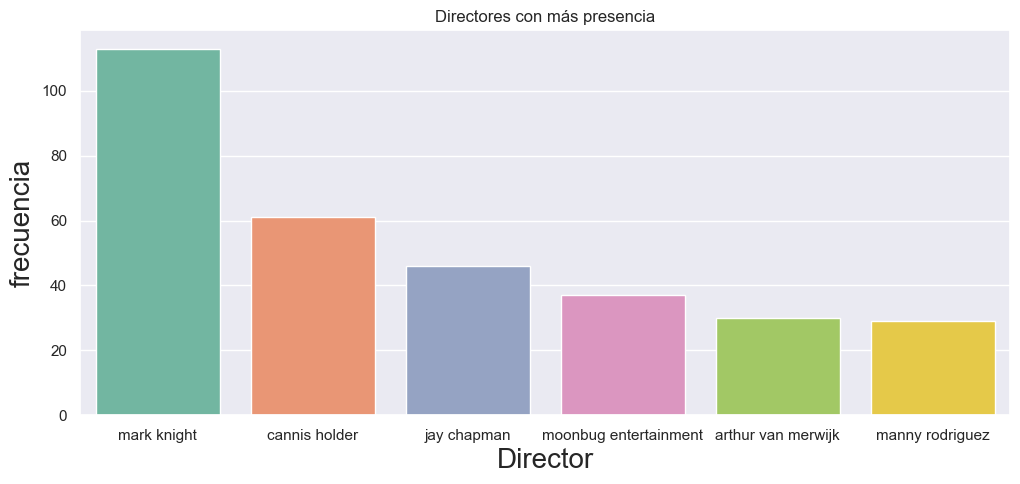

In [59]:
plt.figure(figsize=(12,5))
sns.set(style="darkgrid")
p = sns.countplot(x='nombre', data = director_df, palette='Set2',order=director_df['nombre'].value_counts().index[1:7]);
plt.title('Directores con más presencia');
p.set_xlabel("Director", fontsize = 20);
p.set_ylabel("frecuencia", fontsize = 20);

In [60]:
# Formamos un DataFrame con la cantidad y porcentaje por nombre de director
count = director_df['nombre'].value_counts()
percent = 100 * director_df['nombre'].value_counts(normalize=True)
nombre = pd.Series(lista_director)
director_df = pd.DataFrame({'count':count, 'percent': percent.round(1)})
director_df.head()

,count,percent
no_data,8259,33.6
mark knight,113,0.5
cannis holder,61,0.2
jay chapman,46,0.2
moonbug entertainment,37,0.2


mark knight es el director con más presencia 

### **Actor/ Actriz con más presencia**

In [69]:
l = streaming_df['cast'].shape[0]   

lista_actor = []

for i in range(0,l):
    lista = streaming_df['cast'].iloc[i].split(',')
    for elemento in lista:
        lista_actor.append(elemento)  

# print(len(lista_director))
print(len(lista_actor))

119713


In [70]:
data = {'nombre':lista_actor} 
actor_df = pd.DataFrame(data)
actor_df.head()

,nombre
0,brendan gleeson
1,taylor kitsch
2,gordon pinsent
3,mahesh manjrekar
4,abhay mahajan


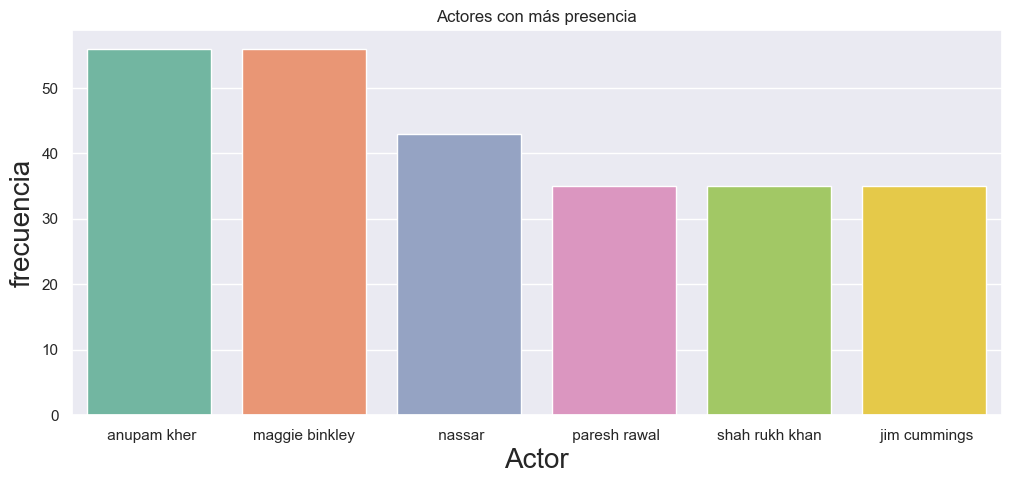

In [71]:
#actor_df
plt.figure(figsize=(12,5))
sns.set(style="darkgrid")
p = sns.countplot(x='nombre', data = actor_df, palette='Set2',order=actor_df['nombre'].value_counts().index[1:7]);
plt.title('Actores con más presencia');
p.set_xlabel("Actor", fontsize = 20);
p.set_ylabel("frecuencia", fontsize = 20);

Los actores *maggie binkley* y *anupam kher* son los actores más frecuentes 

### **Análisis de duración de movies**

In [72]:
movie_df = streaming_df[streaming_df['type'] == 'movie']

In [73]:
movie_df = movie_df[movie_df['duration_int'] > 0]

In [74]:
print(movie_df['duration_int'].min())
print(movie_df['duration_int'].max())

1
601


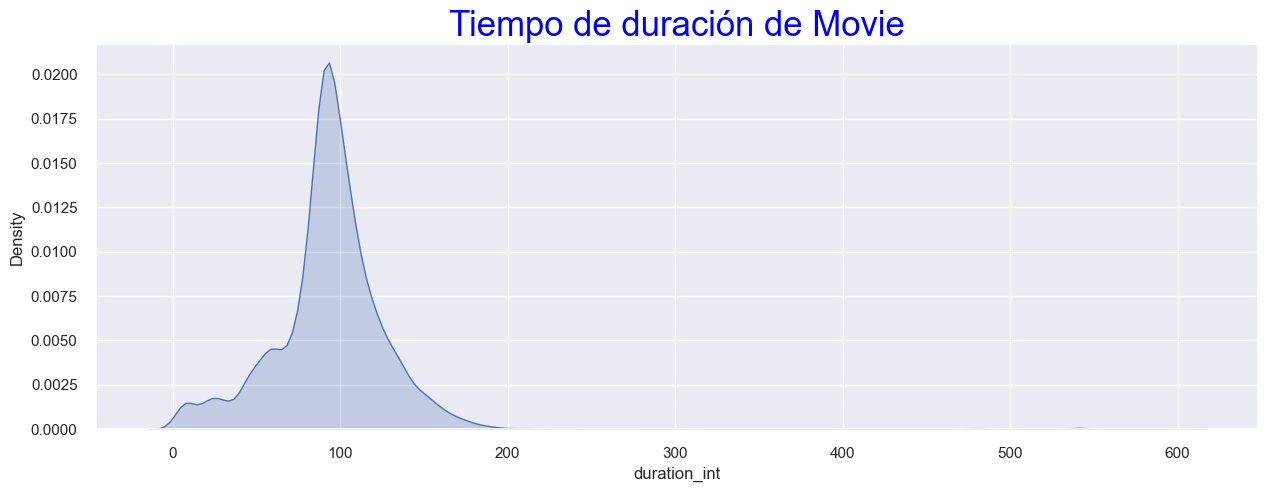

In [77]:
sns.set(style='darkgrid')
sns.kdeplot(data=movie_df['duration_int'], shade=True);
plt.title('Tiempo de duración de Movie', fontsize = 25, color = 'blue');

Podemos ver que las peliculas tienen un promedio de duración de 100 minutos 